In [21]:
import pandas as pd
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import utils9
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

Here is the Realistic Use Case:Analyzing COVID-19 Sentiment on Twitter 

The Model will be use perform Predictive Text Classification on text data.

Description of Features: 
The names and usernames have been given codes to avoid any privacy concerns.

* Location: Location from where the tweet was posted.
* TweetAt: Date of the tweet.
* OriginalTweet: The actual content of the tweet.

Label
* Sentiment Classes: Extremely Negative, Negative, Neutral, Positive, Extremely Positive.

Usability and Implementation:
For this use case, Only Original Tweet wii be considered based on its important: 
* OriginalTweet:To understand and gain insight into public opinions, fears and reactions during the early stage of the pandemic.

Label:
* Sentiment Classes

Given the global significance of Covid-19 as a health crisis that claimed many lives, it will be worthy to note that both false positives and false negatives can impede and hinder effective response efforts by the governments and their agencies worldwide. I am of the opinion that both prediction errors should be avoided and optimal solution should be applied at all time to ensure model accuracy.

# Load the dataset into a Pandas DataFrame
coronavirus = pd.read_csv("Coronavirus_NLP.csv", index_col=0)

In [22]:
# Load the dataset into a Pandas DataFrame
coronavirus = pd.read_csv("corona_nlpu.csv", encoding='latin1', index_col=0)


# Display the DataFrame to check if the datase loaded correctly
print("Original dataset:")
coronavirus.head()



Original dataset:


,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3802,48754,Vagabonds,16-03-2020,My food stock is not the only one which is emp...,Positive
3803,48755,Vagabonds,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [23]:
# Drop the missing column
coronavirus.dropna(inplace=True)

In [24]:
# Check for null value in the dataset
coronavirus.isnull().sum().sum()

0

In [25]:
# download nltk and Apply remove stopwords to the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# filters out any words that are present in the set of English stopwords and split
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiwue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Apply Clean text functions on data
def clean_text(text):
    # Remove any characters that are not alphanumeric or whitespace.
    text = re.sub(r'[^\w\s]', '', text)
    # Remove URLs from the text
    text = re.sub(r"http\S+|www\S+|pic.twitter.com\S+", "", text)
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', "", text)
    # Converts the text to lowercase
    text = text.lower()
    return text

In [43]:
# creates a new column called 'Cleaned_Tweets
coronavirus['Cleaned_Tweets'] = coronavirus['OriginalTweet'].apply(clean_text)


In [44]:
# further refined text and remove common English stopwords from the cleaned tweets
coronavirus['Cleaned_Tweets'] = coronavirus['Cleaned_Tweets'].apply(remove_stopwords)

In [4]:
# creates a new column called words
#coronavirus['words'] = coronavirus['OriginalTweet'].apply(clean_text)

In [10]:
# create a list of text and splits it into individual words.
def tokenize_text(text):
    return text.split()

In [11]:
# Display the label uqique classes
coronavirus['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [12]:
# Create a list of all tweets and join each tokenized tweet with a space
all_tweets_text = [' '.join(tweet) for tweet in coronavirus['Cleaned_Tweets']]


In [13]:
# Display coronavirus.head
coronavirus.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Cleaned_Tweets
UserName,,,,,,
3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv
3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3802,48754,Vagabonds,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
3803,48755,Vagabonds,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...


In [14]:
# Provides the summary of the dataframe
coronavirus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41155 entries, 3799 to 44955
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ScreenName      41155 non-null  int64 
 1   Location        41155 non-null  object
 2   TweetAt         41155 non-null  object
 3   OriginalTweet   41155 non-null  object
 4   Sentiment       41155 non-null  object
 5   Cleaned_Tweets  41155 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.2+ MB


In [15]:
all_tweets_lengths = [len(tweet) for tweet in coronavirus['Cleaned_Tweets']]


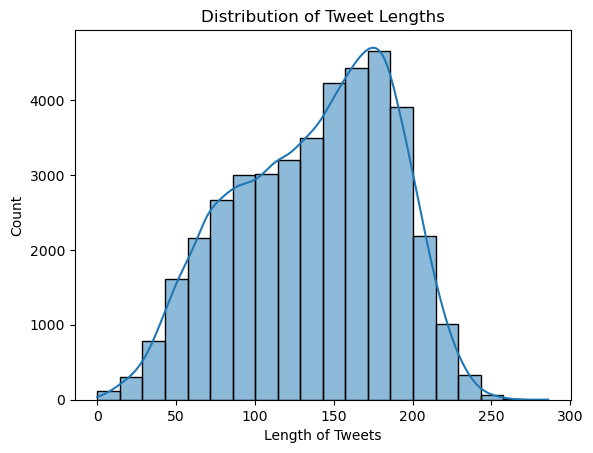

In [16]:

# Plotting histogram using Seaborn
sns.histplot(all_tweets_lengths,bins=20, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Length of Tweets')
plt.ylabel('Count')
plt.show()


In [17]:
# Save the data as a CSV file
coronavirus.to_csv("cleaned_data.csv", index=False)

# Print a success message
print("Data saved as cleaned_data.csv")

Data saved as cleaned_data.csv


In [18]:
# Use the describe function to get statistical summary
coronavirus.describe()

,ScreenName
count,41155.000000
mean,69328.698190
std,11881.356662
min,48751.000000
25%,59039.500000
50%,69328.000000
75%,79618.500000
max,89907.000000


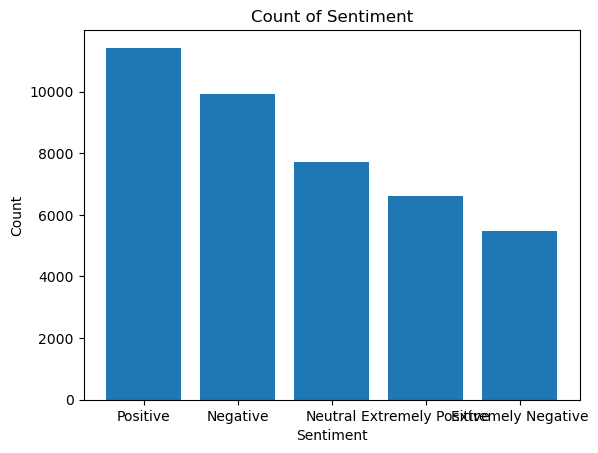

Observations:
Positive: 11422 instances
Negative: 9917 instances
Neutral: 7712 instances
Extremely Positive: 6624 instances
Extremely Negative: 5480 instances


In [19]:
# Get Count of Sentiment Class 
class_counts = coronavirus['Sentiment'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Sentiment')
plt.show()

# Observations
print("Observations:")
for sentiment, count in class_counts.items():
    print(f"{sentiment}: {count} instances")


Based the viusalization the sentiment class were represented using distribution of different sentiment classes, each instance were observed to correspond to a data point or classified into one of the sentiment classes under study. 

In [20]:
# prepare x and y
x = coronavirus['Cleaned_Tweets']
y = coronavirus['Sentiment']
x

UserName
3799                           menyrbie philgahan chrisitv
3800     advice talk neighbours family exchange phone n...
3801     coronavirus australia woolworths give elderly ...
3802     food stock one empty please dont panic enough ...
3803     ready go supermarket covid19 outbreak im paran...
                               ...                        
44951    airline pilots offering stock supermarket shel...
44952    response complaint provided citing covid19 rel...
44953    know getting tough kameronwilds rationing toil...
44954    wrong smell hand sanitizer starting turn coron...
44955    tartiicat well newused rift going 70000 amazon...
Name: Cleaned_Tweets, Length: 41155, dtype: object

In [21]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus to numerical features
x_tfidf = tfidf_vectorizer.fit_transform(coronavirus['Cleaned_Tweets'])

# Print the shape of the resulting matrix
print("Shape of the numerical features matrix:", x_tfidf.shape)
x_tfidf 

Shape of the numerical features matrix: (41155, 60535)


<41155x60535 sparse matrix of type '<class 'numpy.float64'>'
	with 721568 stored elements in Compressed Sparse Row format>

In [22]:
# Splitting the data into training 80%, validation 10% and testing 10%
# Splitting the data into training 80%, and testing 20%
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=0)

# Splitting the testing set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

print(x_test)

  (0, 16176)	0.40745963088269443
  (0, 9713)	0.27441504384735216
  (0, 27471)	0.29972891383758204
  (0, 37831)	0.6878395988421597
  (0, 11711)	0.2048511845622622
  (0, 56839)	0.1427640454257275
  (0, 58532)	0.18869761064250026
  (0, 55860)	0.19543002910174673
  (0, 45357)	0.16384931433696379
  (0, 51585)	0.16677192324718265
  (0, 13378)	0.07005398042622367
  (1, 58086)	0.2691864754488137
  (1, 47244)	0.262197226197121
  (1, 13720)	0.2785440294265408
  (1, 45257)	0.21806249660737828
  (1, 44192)	0.2927504863859528
  (1, 19196)	0.2228813176219061
  (1, 32093)	0.1911027149296454
  (1, 31966)	0.1913435023725406
  (1, 42755)	0.1913435023725406
  (1, 25734)	0.17723394716944088
  (1, 32687)	0.1663979332340622
  (1, 26588)	0.1717061375829612
  (1, 13638)	0.19942489202560965
  (1, 47967)	0.15832340493325772
  :	:
  (4115, 60425)	0.20378440073391954
  (4115, 16122)	0.21163386297395917
  (4115, 39050)	0.21163386297395917
  (4115, 25729)	0.19821511864357452
  (4115, 29884)	0.21163386297395917
  (4

In [23]:
# Define a function to train a decision tree and return accuracy
def train_decision_tree(criterion, max_depth=None, max_features=2, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2):
    # Initialize decision tree classifier
    clf = DecisionTreeClassifier(criterion=criterion,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 min_impurity_decrease=min_impurity_decrease,
                                 min_samples_leaf=min_samples_leaf,
                                 min_samples_split=min_samples_split,
                                 random_state=42)
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Predict the labels
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return clf, accuracy

    
# Results dictionary to store the accuracies
results = {}
models ={}

# Define the hyperparameters in a dictionary
hyperparameters = {
    'max_depth_values': [None, 2, 4],
    'max_features_values': ['log2', 'sqrt', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'min_samples_leaf_values': [1, 2, 3],
    'min_samples_split_values': [2, 3, 5]
}


# Hyperparameters to experiment with
max_depth_values = [None, 2, 4]
max_features_values = ['log2', 'sqrt', None]
min_impurity_decrease_values = [0.0, 0.1, 0.2]
min_samples_leaf_values = [1, 2,3]
min_samples_split_values = [2, 3, 5]


# Loop through all combinations of hyperparameters
for criterion in ['gini', 'entropy']:
    for max_depth in max_depth_values:
        for max_features in max_features_values:
            for min_impurity_decrease in min_impurity_decrease_values:
                for min_samples_leaf in min_samples_leaf_values:
                    for min_samples_split in min_samples_split_values:
                        # Train decision tree with current hyperparameters
                        model, accuracy = train_decision_tree(criterion, max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split)
                        
                        # Store the accuracy along with the hyperparameters in the results dictionary
                        results[(criterion, max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split)] = accuracy
                        models[(criterion, max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split)] = model


In [34]:
params = hyperparameters
sorted_results = (params, accuracy)                   
sorted_models = (params, model)

# Sort the results by accuracy in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
sorted_models = sorted(models.items(), key=lambda x: x[1], reverse=True)

# Print the top performing models
for i, (params, accuracy) in enumerate(sorted_results[:2]):
    print(f"Model {i+1}:")
    print(f"Accuracy: {accuracy}")
    print(f"Hyperparameters: {params}")
    print()
'''   
all_models =[]
    
for i, (params, model) in enumerate(sorted_models[:2]):
   all_models.append(model)

model = all_models[0]
model_2 = all_models[1]
'''

Model 1:
Accuracy: 0.44630709426627796
Hyperparameters: ('gini', None, None, 0.0, 1, 2)

Model 2:
Accuracy: 0.4399902818270165
Hyperparameters: ('gini', None, None, 0.0, 1, 3)



'   \nall_models =[]\n    \nfor i, (params, model) in enumerate(sorted_models[:2]):\n   all_models.append(model)\n\nmodel = all_models[0]\nmodel_2 = all_models[1]\n'

the 80%, 10%, and 10% for training, validation and testing split is ideal choice for this project because it provides a solid foundation for training while ensuring that I have enough data to precisely evaluate and fine-tune the model when neceaary.

In [35]:
 # Predict the labels
train_pred = model.predict(x_train)
val_pred = model.predict(x_val)
   

train_pred_2 = model_2.predict(x_train)
val_pred_2 = model_2.predict(x_val)

#best_model_train_pred = model.predict(x_train)
#best_model_val_pred = model.predict(x_val)

 # Calculate accuracy
accuracy_train = accuracy_score(y_train, train_pred)
accuracy_val = accuracy_score(y_val, val_pred)


print(f"Train Accuracy for model 1: {accuracy_train}")
print("______________________________________________________________________________")
print(f"Val Accuracy for model 1: {accuracy_val}") 



print("\n\n\n ******************************************************************************")
 # Calculate accuracy
accuracy_train = accuracy_score(y_train, train_pred_2)
accuracy_val = accuracy_score(y_val, val_pred_2)


print(f"Train Accuracy for model 2: {accuracy_train}")
print("______________________________________________________________________________")
print(f"Val Accuracy for model 2: {accuracy_val}") 

Train Accuracy for model 1: 0.2790973150285506
______________________________________________________________________________
Val Accuracy for model 1: 0.2767922235722965



 ******************************************************************************
Train Accuracy for model 2: 0.9999392540396064
______________________________________________________________________________
Val Accuracy for model 2: 0.4262454434993925


In [37]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress specific warnings from scikit-learn
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


In [38]:
  # Calculate accuracy
report_train = classification_report(y_train, train_pred)
report_val = classification_report(y_val, val_pred)


print(f"Train Classification report for model 1: {report_train}")
print("______________________________________________________________________________\n")
print(f"Val classification_report for model 1: {report_val}") 




print("\n\n\n ******************************************************************************")

report_train = classification_report(y_train, train_pred_2)
report_val = classification_report(y_val, val_pred_2)


print(f"Train Classification report for model 2: {report_train}")
print("______________________________________________________________________________\n")
print(f"Val classification_report for model 2: {report_val}") 

Train Classification report for model 1:                     precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00      4407
Extremely Positive       0.00      0.00      0.00      5291
          Negative       0.00      0.00      0.00      7902
           Neutral       0.00      0.00      0.00      6135
          Positive       0.28      1.00      0.44      9189

          accuracy                           0.28     32924
         macro avg       0.06      0.20      0.09     32924
      weighted avg       0.08      0.28      0.12     32924

______________________________________________________________________________

Val classification_report for model 1:                     precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       525
Extremely Positive       0.00      0.00      0.00       644
          Negative       0.00      0.00      0.00      1021
           Neutral       0.00      0.00      0.00       

In [39]:
 # Calculate accuracy
cf_train = confusion_matrix(y_train, train_pred)
cf_val = confusion_matrix(y_val, val_pred)


print(f"Train confusion_matrix for model 1:\n {cf_train}")
print("______________________________________________________________________________\n")
print(f"Val confusion_matrix for model 1:\n {cf_val}") 




print("\n\n\n ******************************************************************************")

cf_train = confusion_matrix(y_train, train_pred_2)
cf_val = confusion_matrix(y_val, val_pred_2)


print(f"Train confusion_matrix For model 2:\n {cf_train}")
print("______________________________________________________________________________\n")
print(f"Val confusion_matrix for model 2:\n {cf_val}") 




Train confusion_matrix for model 1:
 [[   0    0    0    0 4407]
 [   0    0    0    0 5291]
 [   0    0    0    0 7902]
 [   0    0    0    0 6135]
 [   0    0    0    0 9189]]
______________________________________________________________________________

Val confusion_matrix for model 1:
 [[   0    0    0    0  525]
 [   0    0    0    0  644]
 [   0    0    0    0 1021]
 [   0    0    0    0  786]
 [   0    0    0    0 1139]]



 ******************************************************************************
Train confusion_matrix For model 2:
 [[4407    0    0    0    0]
 [   0 5291    0    0    0]
 [   1    0 7901    0    0]
 [   1    0    0 6134    0]
 [   0    0    0    0 9189]]
______________________________________________________________________________

Val confusion_matrix for model 2:
 [[199  24 174  47  81]
 [ 29 271  57  44 243]
 [153  87 372 198 211]
 [ 33  25 144 439 145]
 [ 63 211 204 188 473]]


In [41]:
# Train the best decision tree model (model_2)
best_model = model_2.fit(x_train, y_train)

# Generate predictions on the training and validation data
train_predictions = best_model.predict(x_train)
val_predictions = best_model.predict(x_val)

# Display classification report and confusion matrix for training data
print("Classification Report - Training Data:")
print("______________________________________________________________________________\n")
print(classification_report(y_train, train_predictions))
print("Confusion Matrix - Training Data:")
print("______________________________________________________________________________\n")
print(confusion_matrix(y_train, train_predictions))

print("\n\n\n ******************************************************************************")

# Display classification report and confusion matrix for validation data
print("\nClassification Report - Validation Data:")
("______________________________________________________________________________\n")
print(classification_report(y_val, val_predictions))
("______________________________________________________________________________\n")
print("Confusion Matrix - Validation Data:")
("______________________________________________________________________________\n")
print(confusion_matrix(y_val, val_predictions))



Classification Report - Training Data:
______________________________________________________________________________

                    precision    recall  f1-score   support

Extremely Negative       1.00      1.00      1.00      4407
Extremely Positive       1.00      1.00      1.00      5291
          Negative       1.00      1.00      1.00      7902
           Neutral       1.00      1.00      1.00      6135
          Positive       1.00      1.00      1.00      9189

          accuracy                           1.00     32924
         macro avg       1.00      1.00      1.00     32924
      weighted avg       1.00      1.00      1.00     32924

Confusion Matrix - Training Data:
______________________________________________________________________________

[[4407    0    0    0    0]
 [   0 5291    0    0    0]
 [   1    0 7901    0    0]
 [   1    0    0 6134    0]
 [   0    0    0    0 9189]]



 ******************************************************************************


# Display the decision tree
display_tree(best_model)
    


Model 2 outperforms moddel 1 on both training and validation sets, the metrics shows that model 2 was consistent and performed better across all classes thereby showcasing predictive power over model 1, In consideration of the classification metrics and accuracy as provided, Model 2's higher accuarcy and performance on the validation set sugguests that is more robust and reliable for making predictions on unseen data. 